In [1]:
import pandas as pd
import datetime

all_o3_df = pd.read_csv("./Resources/all_years_o3.csv")
#turn date column elements into datetime objects
all_o3_df["Date"] = pd.to_datetime(all_o3_df["Date"])
all_o3_df = all_o3_df.set_index("Date")

all_pm25_df = pd.read_csv("./Resources/all_years_pm25.csv")
#turn date column elements into datetime objects
all_pm25_df["Date"] = pd.to_datetime(all_pm25_df["Date"])
all_pm25_df = all_pm25_df.set_index("Date")
all_pm25_df.head()

In [2]:
#inputs for the function are the complete dataframe for one particulate (df), the city name (city), an integer tuple in the 
#form of (month, day) for the shutdown date (shutdown_date, for example (1, 23) for 1/23) - NOTE that this is the 
#date where the strictest lockdown regulations start for that city, and an integer tuple in the 
#form of (month, day) for the reopen date (reopen_date, for example (4, 8) for 4/8) - NOTE that this is the date when the city 
#begins to reopen from the strictest lockdown regulations
#
#returns a dataframe with the correct shutdown date ranges for all years in the data set
def shutdownData(df, city, shutdown_date, reopen_date):

    mask = ((pd.Series(map(lambda x: x.month <= shutdown_date[0], df.index.date), index=df.index)) &
                                                ((pd.Series(map(lambda x: x.day < shutdown_date[1], df.index.date), index=df.index))))
    #first get dates after the start date for all years
    shutdown_time_period_df = df.loc[~mask, :]

    #remove the later months
    shutdown_time_period_df = shutdown_time_period_df.loc[shutdown_time_period_df.index.month<=reopen_date[0]]

    #now get dates before the end date
    mask2 = ((pd.Series(map(lambda x: x.month == reopen_date[0], shutdown_time_period_df.index.date), index=shutdown_time_period_df.index)) &
                                                ((pd.Series(map(lambda x: x.day >= reopen_date[1], shutdown_time_period_df.index.date), index=shutdown_time_period_df.index))))

    shutdown_time_period_df = shutdown_time_period_df.loc[~mask2, :]

    shutdown_time_period_df = shutdown_time_period_df.loc[shutdown_time_period_df["City"] == city]
    
    return shutdown_time_period_df

shutdown_time_period_pm_df = shutdownData(all_pm25_df, "Los Angeles", (3, 19), (5, 8))

#print("The 'shutdownData' function is working correctly:", test_df.equals(shutdown_time_period_pm_df))

In [3]:
#so to get the ozone information for Wuhan between the shutdown date of 1/23 and the reopening date of 4/8, we 
#need to call the function as follows:
LA_o3_shutdown_df = shutdownData(all_o3_df, "Los Angeles", (3, 19), (5, 8))
LA_o3_shutdown_df

,Country,City,Specie,count,min (ppb),max (ppb),median (ppb)
Date,,,,,,,
2017-01-19,US,Los Angeles,o3,18,5.0,32.0,23.0
2017-01-20,US,Los Angeles,o3,24,7.0,34.0,21.0
2017-01-21,US,Los Angeles,o3,24,7.0,35.0,29.0
2017-01-22,US,Los Angeles,o3,24,6.0,33.0,19.0
2017-01-23,US,Los Angeles,o3,24,1.0,37.0,30.0
...,...,...,...,...,...,...,...
2020-05-03,US,Los Angeles,o3,24,3.0,33.0,21.0
2020-05-04,US,Los Angeles,o3,24,1.0,52.0,19.0
2020-05-05,US,Los Angeles,o3,24,0.0,57.0,19.0


In [4]:
#get average of medians by year
bar_plot_info = shutdown_time_period_pm_df.groupby(shutdown_time_period_pm_df.index.year).mean()
bar_plot_info

,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,
2017,65.027397,1.850685,28.339726,10.846575
2018,69.917808,2.642466,31.736986,12.028767
2019,70.287671,2.800000,30.619178,11.052055
2020,61.418919,4.154054,21.256757,10.416216


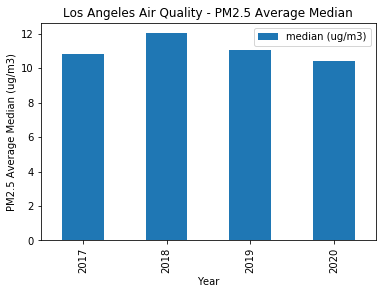

In [5]:
#plot of average medians
bar_plot_axes = bar_plot_info.plot(kind="bar", y="median (ug/m3)")

#set titles, axes labels
bar_plot_axes.set_title("Los Angeles Air Quality - PM2.5 Average Median")
bar_plot_axes.set_ylabel("PM2.5 Average Median (ug/m3)")
bar_plot_axes.set_xlabel("Year")

bar_plot_axes.get_figure().savefig("./outputs/LA/LA_pm25median.png")

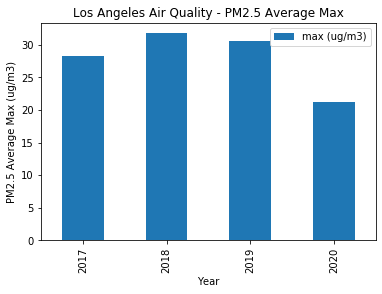

In [6]:
#plot of average maximums
bar_plot_axes_2 = bar_plot_info.plot(kind="bar", y="max (ug/m3)")

#set titles, axes labels
bar_plot_axes_2.set_title("Los Angeles Air Quality - PM2.5 Average Max")
bar_plot_axes_2.set_ylabel("PM2.5 Average Max (ug/m3)")
bar_plot_axes_2.set_xlabel("Year")

bar_plot_axes_2.get_figure().savefig("./outputs/LA/LA_pm25max.png")

In [7]:
#get percentage decrease year over year
bar_plot_info.pct_change()


,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,
2017,NaN,NaN,NaN,NaN
2018,0.075205,0.427831,0.119876,0.108992
2019,0.005290,0.059616,-0.035221,-0.081198
2020,-0.126178,0.483591,-0.305770,-0.057531


In [8]:
#combine three previous years into an average median value
prior_years_df = bar_plot_info.loc[bar_plot_info.index<2020]
prior_averages = prior_years_df.mean()
prior_averages

count             68.410959
min (ug/m3)        2.431050
max (ug/m3)       30.231963
median (ug/m3)    11.309132
dtype: float64

,average median during shutdown dates (ug/m3)
Prior Years,NaN
2020,-0.078955


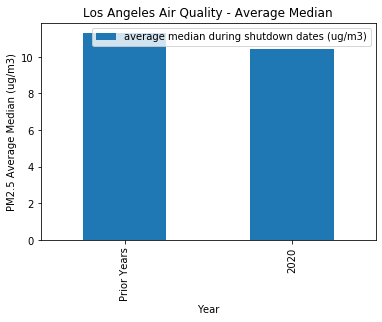

In [9]:
summary_bar_plot = pd.DataFrame({"average median during shutdown dates (ug/m3)":[prior_averages["median (ug/m3)"], 
                                                                                 bar_plot_info["median (ug/m3)"][2020]]}, 
                                index=["Prior Years", "2020"])

summary_axes = summary_bar_plot.plot(kind="bar")


#set titles, axes labels
summary_axes.set_title("Los Angeles Air Quality - Average Median")
summary_axes.set_ylabel("PM2.5 Average Median (ug/m3)")
summary_axes.set_xlabel("Year")

summary_axes.get_figure().savefig("./outputs/LA/LA_3yearmedianchange.png")

summary_bar_plot.pct_change()

In [10]:
#look at o3 values for wuhan for the same time period by year
LA_avg_o3_df = LA_o3_shutdown_df.groupby(LA_o3_shutdown_df.index.year).mean()
LA_avg_o3_df

,count,min (ppb),max (ppb),median (ppb)
Date,,,,
2017,22.863014,4.917808,43.438356,23.109589
2018,24.068493,5.260274,41.958904,21.657534
2019,22.657534,4.698630,37.260274,18.863014
2020,21.864865,4.108108,36.040541,18.891892


In [11]:
#combine three previous years into an average median value
prior_years_o3_df = LA_avg_o3_df.loc[LA_avg_o3_df.index<2020]
prior_o3_averages = prior_years_o3_df.mean()
prior_o3_averages

count           23.196347
min (ppb)        4.958904
max (ppb)       40.885845
median (ppb)    21.210046
dtype: float64

,average median during shutdown dates (ppb)
Prior Years,NaN
2020,-0.109295


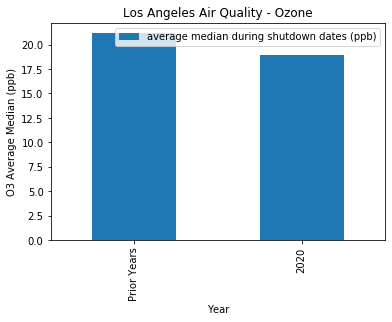

In [12]:
summary_bar_plot = pd.DataFrame({"average median during shutdown dates (ppb)":[prior_o3_averages["median (ppb)"], 
                                                                                 LA_avg_o3_df["median (ppb)"][2020]]}, 
                                index=["Prior Years", "2020"])

o3_axes = summary_bar_plot.plot(kind="bar")

#set titles, axes labels
o3_axes.set_title("Los Angeles Air Quality - Ozone")
o3_axes.set_ylabel("O3 Average Median (ppb)")
o3_axes.set_xlabel("Year")

o3_axes.get_figure().savefig("./outputs/LA/LA_3yearmedianchange_o3.png")

summary_bar_plot.pct_change()

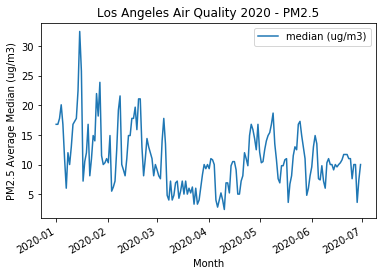

In [13]:
import matplotlib.pyplot as plt
line_plot, line_axes = plt.subplots()

LA_2020_pm25_df = all_pm25_df.loc[(all_pm25_df.index.year == 2020) & (all_pm25_df["City"] == "Los Angeles")]
LA_line_axes = LA_2020_pm25_df.plot(kind="line", y="median (ug/m3)", ax=line_axes)

#set titles, axes labels
LA_line_axes.set_title("Los Angeles Air Quality 2020 - PM2.5")
LA_line_axes.set_ylabel("PM2.5 Average Median (ug/m3)")
LA_line_axes.set_xlabel("Month")

LA_line_axes.get_figure().savefig("./outputs/LA/LA_2020_line_plot.png")

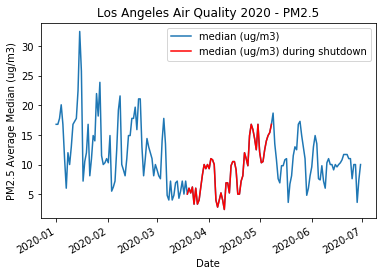

In [14]:
LA_2020_shutdown = LA_2020_pm25_df["3/19/20":"5/8/20"]
shutdown_axes = LA_2020_shutdown.plot(y="median (ug/m3)", style="r", ax=line_axes)
shutdown_axes.legend(["median (ug/m3)", "median (ug/m3) during shutdown"])
line_plot